In [1]:
import sklearn
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

boston = load_boston()

In [2]:
print(boston.keys())
print(boston.data.shape)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)


In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
X = boston.data
y = boston.target

Ex. 1.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state = 19)

print(X.shape[0])
print(float(X_train.shape[0]) / float(X.shape[0]))
print(float(X_test.shape[0]) / float(X.shape[0]))

506
0.7984189723320159
0.2015810276679842


Ex. 2.

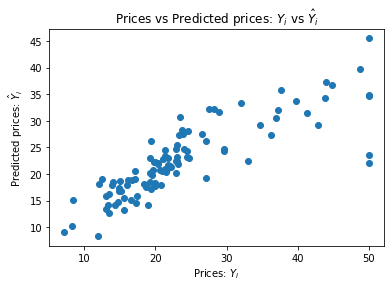

In [6]:
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()


Ex. 3.

In [7]:
mean_squared_error(y_test, y_pred)

35.08314021765449

Ex. 4.

In [8]:
print("Model score for test data: ", reg.score(X_test, y_test))
print("Model score for train data: ", reg.score(X_train, y_train))

Model score for test data:  0.6647017039061678
Model score for train data:  0.7570640629573775


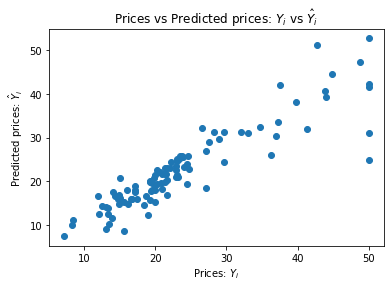

In [9]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

polynomial_features= PolynomialFeatures(degree=2)
x_new = polynomial_features.fit_transform(X, y)
X_train2, X_test2, y_train2, y_test2 = train_test_split(x_new, y, test_size=0.2, train_size=0.8, random_state = 19)
#X_train2 = polynomial_features.fit_transform(X_train, y_train)
#X_test2 = polynomial_features.fit_transform(X_test, y_test)

model2 = LinearRegression().fit(X_train2, y_train2)
y_pred2 = model2.predict(X_test2)

plt.scatter(y_test2, y_pred2)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [10]:
print("Model score for test data: ", model2.score(X_test2, y_test2))
print("Model score for train data: ", model2.score(X_train2, y_train2))
print("MSE: ", mean_squared_error(y_test2, y_pred2))

Model score for test data:  0.8058062750844769
Model score for train data:  0.9456257259118286
MSE:  20.318998813800544


Ex. 5.

C:\Users\misie\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:9: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  if __name__ == '__main__':
c:\Users\misie\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
c:\Users\misie\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1060.9838434848723, tolerance: 3.1847727599009903
  positive)
c:\Users\misie\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

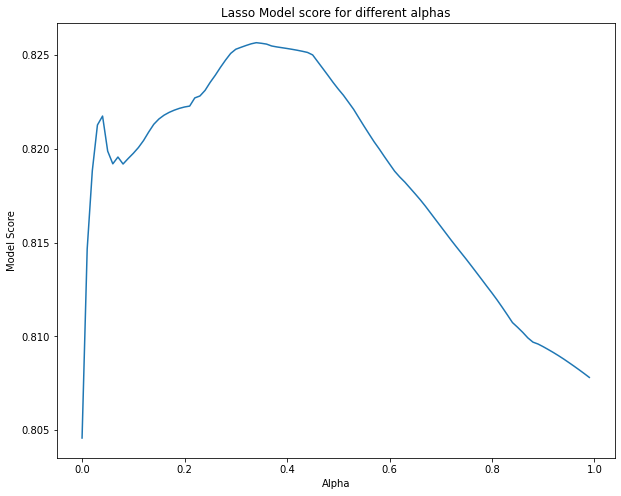

In [11]:
from sklearn.linear_model import Ridge, Lasso
import numpy as np

alphas = np.arange(0, 1, 0.01)
scores = []

for el in alphas:
    model = Lasso(alpha=el, max_iter=2000)
    model.fit(X_train2, y_train2)
    score = model.score(X_test2, y_test2)
    scores.append(score)
    
plt.figure(figsize=(10, 8))
plt.plot(alphas, scores)
plt.title("Lasso Model score for different alphas")
plt.xlabel("Alpha")
plt.ylabel("Model Score")
plt.show()


Ex. 6.

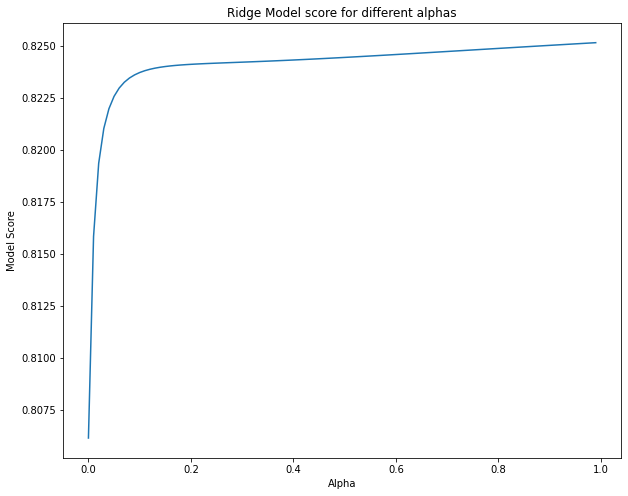

In [12]:
scores_ridge = []

for el in alphas:
    model = Ridge(alpha=el, max_iter=2000)
    model.fit(X_train2, y_train2)
    score = model.score(X_test2, y_test2)
    scores_ridge.append(score)
    
plt.figure(figsize=(10, 8))
plt.plot(alphas, scores_ridge)
plt.title("Ridge Model score for different alphas")
plt.xlabel("Alpha")
plt.ylabel("Model Score")
plt.show()

# ---------------------------------------------------

In [13]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer()
 
df = pd.DataFrame(data.data)
df.columns = data.feature_names
y = data.target
X = data.data

Ex. 1.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state = 19)

print(X.shape[0])
print(float(X_train.shape[0]) / float(X.shape[0]))
print(float(X_test.shape[0]) / float(X.shape[0]))

569
0.7996485061511424
0.20035149384885764


Ex. 2.

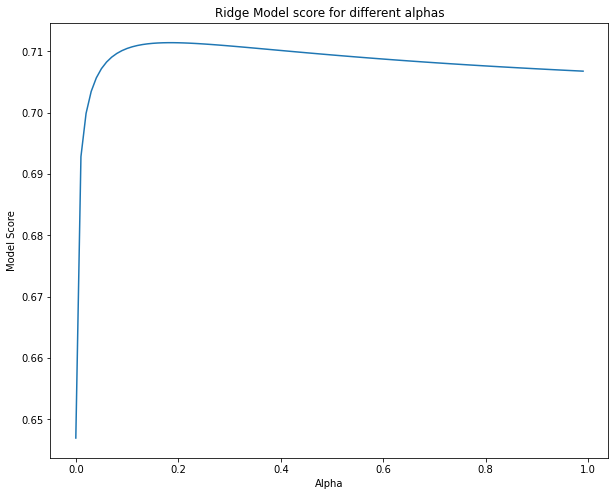

In [15]:
alhpas = np.linspace(0.0001, 1, 10)

scores_ridge = []

for el in alphas:
    model = Ridge(alpha=el, max_iter=2000)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    scores_ridge.append(score)
    
plt.figure(figsize=(10, 8))
plt.plot(alphas, scores_ridge)
plt.title("Ridge Model score for different alphas")
plt.xlabel("Alpha")
plt.ylabel("Model Score")
plt.show()